In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import h5py
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import FD as FD_file
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.gridspec as gridspec

In [2]:
xmin = 10
xmax = 180
legendsize = 16.5
spacetimenamesize = 31

In [3]:
def plotTestMetric(fig, inner):
    spacetime = 'TestMetric'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_withoutbumps.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometric_withoutbumps.csv')

    idec = -1
    ymin = 2e-13
    ymax = 1e0

    ax = plt.Subplot(fig, inner[0])
    ax.set_title('Slicing method', size=spacetimenamesize)
    ax.text(0.5, 0.95, 'Test Metric', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1) #4th order increase

    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$')
    #ax.legend(loc=1, prop={'size': legendsize})
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_yticklabels([])
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    ax.set_title('Geometrical method', size=spacetimenamesize)
    ax.loglog(fg['N'], fg['4R'], 'C0', label=r'$v={}^{(3)}R$'+' or '+r'${}^{(4)}R$')
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)

    ax.loglog(fg['N'], fg['E2'], 'C1', label=r'$v=E^2$')
    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)

    ax.loglog(fg['N'], fg['B2'], 'C4', label=r'$v=B^2$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)

    ax.loglog(fg['N'], fg['ET'], 'C5', label=r'$v=E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6', label=r'$v=B^T$')
    
    
    ax.loglog(fg['N'], fg['N']*0, 'C2--', linewidth=1, label='Truncation \n error')
    ax.loglog(fg['N'], fg['N']*0, 'C3--', linewidth=1, label='Rounding \n error')
    ax.loglog(fg['N'], fg['N']*0, 'k-', label='64bit')
    ax.loglog(fg['N'], fg['N']*0, 'k-.', linewidth = 2, label='128bit')

    ax.set_yticklabels([])
    ax.legend(prop={'size': legendsize}, loc=4, ncol=4, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    
    fig.add_subplot(ax)
    #plt.subplots_adjust(wspace=0)
#plt.savefig('Plots/'+spacetime+'.pdf')

In [4]:
def plotSzekeres(fig, inner):
    spacetime = 'Szekeres'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometrical.csv')

    fs128 = pd.read_csv('ErrorData/'+spacetime+'_Slicing_128bit.csv')
    fg128 = pd.read_csv('ErrorData/'+spacetime+'_Geometrical_128bit.csv')

    ymin = 2e-13
    ymax = 1e0

    ax = plt.Subplot(fig, inner[0])
    ax.set_title('Slicing method', size=spacetimenamesize)
    ax.text(0.5, 0.95, 'Szekeres', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = 0
    iinc = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    
    ax.loglog(fs128['N'], fs128['3R'], 'C0-.', linewidth = 2)
    ax.loglog(fs128['N'], fs128['E2'], 'C1-.', linewidth = 2)
    ax.loglog(fs128['N'], fs128['B2'], 'C4-.', linewidth = 2)
    ax.loglog(fs128['N'], fs128['ET'], 'C5-.', linewidth = 2)
    ax.loglog(fs128['N'], fs128['BT'], 'C6-.', linewidth = 2)

    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    yplot_4th_order_increase = [np.array(fs['3R'])[iinc]*((N/np.array(fs['N'])[iinc])**2.5) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label='Truncation error')
    ax.loglog(fs['N'], yplot_4th_order_increase, 'C3--', linewidth=1, label='Rounding error')

    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    yplot_4th_order_increase = [np.array(fs['E2'])[iinc]*((N/np.array(fs['N'])[iinc])**2.5) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fs['N'], yplot_4th_order_increase, 'C3--', linewidth=1)


    ax.loglog(fs['N'], fs['N']*0, 'k-', label='64bit')
    ax.loglog(fs['N'], fs['N']*0, 'k-.', linewidth = 2, label='128bit')

    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$'+' or '+r'$\mathbb{E}\left(|v|\right)$')
    #ax.legend(loc=1, prop={'size': legendsize})
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    ax.set_title('Geometrical method', size=spacetimenamesize)
    ax.loglog(fg['N'], fg['4R'], 'C0')#, label=r'$v={}^{(4)}R$')
    ax.loglog(fg['N'], fg['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fg['N'], fg['B2'], 'C4')#, label=r'$B^2$')
    ax.loglog(fg['N'], fg['ET'], 'C5')#, label=r'$E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6')#, label=r'$B^T$')
    ax.loglog(fg128['N'], fg128['4R'], 'C0-.', linewidth = 2)
    ax.loglog(fg128['N'], fg128['E2'], 'C1-.', linewidth = 2)
    ax.loglog(fg128['N'], fg128['B2'], 'C4-.', linewidth = 2)
    ax.loglog(fg128['N'], fg128['ET'], 'C5-.', linewidth = 2)
    ax.loglog(fg128['N'], fg128['BT'], 'C6-.', linewidth = 2)

    idec = 0
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    yplot_4th_order_increase = [np.array(fg['4R'])[iinc]*((N/np.array(fg['N'])[iinc])**2.75) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label='Truncation error')

    idec = -6
    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)

    ax.loglog(fs['N'], fs['N']*0, 'k-', label='64bit')
    ax.loglog(fs['N'], fs['N']*0, 'k-.', linewidth = 2, label='128bit')

    ax.set_yticklabels([])
    #ax.legend(loc=3, prop={'size': legendsize})
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
#plt.savefig('Plots/'+spacetime+'.pdf')

In [5]:
def plotPlaneWave(fig, inner):
    spacetime = 'PlaneWave'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometrical.csv')
    ymin = 1e-7
    ymax = 1e2
    ax = plt.Subplot(fig, inner[0])
    #ax.set_title('Slicing method')
    ax.text(0.5, 0.95, 'Plane Wave', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs['N'], fs['Gyxz'], 'C7', label=r'$v=\Gamma^{y}_{xz}$')
    ax.loglog(fs['N'], fs['dxGyxz'], 'C8', label=r'$v=\partial_{x}\Gamma^{y}_{xz}$')
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['Gyxz'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    idec = -3
    yplot_4th_order_decrease = [np.array(fs['dxGyxz'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$')
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    ax.set_yticklabels([])
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    ax = plt.Subplot(fig, inner[1])
    #ax.set_title('Geometrical method')
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0')#, label=r'$v={}^{(4)}R$')
    ax.loglog(fg['N'], fg['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fg['N'], fg['B2'], 'C4')#, label=r'$v=B^2$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['ET'], 'C5')#, label=r'$E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6')#, label=r'$\mathbb{E}\left(|B^T|\right)$')
    yplot_4th_order_decrease = [np.array(fg['BT'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['Bianchi_ID'], 'C7', label=r'$v={}^{(4)}R_{1023} - {}^{(4)}R_{2013} + {}^{(4)}R_{3012}$')
    yplot_4th_order_decrease = [np.array(fg['Bianchi_ID'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.set_yticklabels([])
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    plt.subplots_adjust(wspace=0)
    
def plotPlaneWaveo6(fig, inner):
    spacetime = 'PlaneWave'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_o6.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometrical_o6.csv')
    ymin = 1e-7
    ymax = 1e2
    ax = plt.Subplot(fig, inner[0])
    ax.set_title('Slicing method', size=spacetimenamesize)
    ax.text(0.5, 0.95, 'Plane Wave', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs['N'], fs['Gyxz'], 'C7', label=r'$v=\Gamma^{y}_{xz}$')
    ax.loglog(fs['N'][:-1], fs['dxGyxz'][:-1], 'C8', label=r'$v=\partial_{x}\Gamma^{y}_{xz}$')
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['Gyxz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    idec = -3
    yplot_4th_order_decrease = [np.array(fs['dxGyxz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$')
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    ax.set_yticklabels([])
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    ax = plt.Subplot(fig, inner[1])
    ax.set_title('Geometrical method', size=spacetimenamesize)
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0')#, label=r'$v={}^{(3)}R$'+' or '+r'${}^{(4)}R$')
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fg['N'], fg['B2'], 'C4')#, label=r'$v=B^2$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6')#, label=r'$v=B^T$')
    yplot_4th_order_decrease = [np.array(fg['BT'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)#, label='Truncation error')
    ax.loglog(fg['N'], fg['Bianchi_ID'], 'C7', label=r'$v={}^{(4)}R_{1023} - {}^{(4)}R_{2013} + {}^{(4)}R_{3012}$')
    yplot_4th_order_decrease = [np.array(fg['Bianchi_ID'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.set_yticklabels([])
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    plt.subplots_adjust(wspace=0)
    
def plotPlaneWaveo6R(fig, inner):
    spacetime = 'PlaneWave'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_o6R.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometrical_o6R.csv')
    ymin = 1e-7
    ymax = 1e2
    ax = plt.Subplot(fig, inner[0])
    #ax.set_title('Slicing method')
    ax.text(0.5, 0.95, 'Plane Wave', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs['N'], fs['Gyxz'], 'C7', label=r'$v=\Gamma^{y}_{xz}$')
    ax.loglog(fs['N'][:-1], fs['dxGyxz'][:-1], 'C8', label=r'$v=\partial_{x}\Gamma^{y}_{xz}$')
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['Gyxz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    idec = -3
    yplot_4th_order_decrease = [np.array(fs['dxGyxz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$')
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['40','60','100','150']))
    fig.add_subplot(ax)
    ax = plt.Subplot(fig, inner[1])
    #ax.set_title('Geometrical method')
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0')#, label=r'$v={}^{(3)}R$'+' or '+r'${}^{(4)}R$')
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fg['N'], fg['B2'], 'C4')#, label=r'$v=B^2$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6')#, label=r'$v=B^T$')
    yplot_4th_order_decrease = [np.array(fg['BT'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['Bianchi_ID'], 'C7')#, label=r'$v={}^{(4)}R_{1023} - {}^{(4)}R_{2013} + {}^{(4)}R_{3012}$')
    yplot_4th_order_decrease = [np.array(fg['Bianchi_ID'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)#, label=r'$6^{th}$'+'order truncation error')
    ax.set_yticklabels([])
    #ax.legend(prop={'size': legendsize}, bbox_to_anchor=(0.2105, -0.115), ncol=6, framealpha=1)
    ax.grid()    
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['40','60','100','150']))
    fig.add_subplot(ax)
    plt.subplots_adjust(wspace=0)

In [6]:
def plotBianchiVI(fig, inner):
    spacetime = 'BianchiVI'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometric.csv')
    ymin = 1e-7
    ymax = 1e2
    ax = plt.Subplot(fig, inner[0])
    #ax.set_title('Slicing method')
    ax.text(0.5, 0.95, 'Bianchi VI', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs['N'], fs['Gyzz'], 'C7', label=r'$v=\Gamma^{y}_{zz}$')
    ax.loglog(fs['N'], fs['dxGyzz'], 'C8', label=r'$v=\partial_{x}\Gamma^{y}_{zz}$')
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['Gyzz'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    idec = -3
    yplot_4th_order_decrease = [np.array(fs['dxGyzz'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)#, label='Truncation error')
    ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$'+',  or  '+r'$\mathbb{E}\left(|v|\right)$'+'  if  '+r'$v_{th}=0$', size=spacetimenamesize)
    ax.legend(prop={'size': legendsize}, loc=4, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    ax = plt.Subplot(fig, inner[1])
    #ax.set_title('Geometrical method')
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0', label=r'$v={}^{(4)}R$')
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['E2'], 'C1', label=r'$v=E^2$')
    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['B2'], 'C4', label=r'$v=B^2$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label='Truncation error')
    ax.loglog(fg['N'], fg['ET'], 'C5')#, label=r'$E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6')#, label=r'$B^T$')
    ax.set_yticklabels([])
    #ax.legend(loc=3, prop={'size': legendsize})
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([10,20,40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    
def plotBianchiVIo6(fig, inner):
    spacetime = 'BianchiVI'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_o6.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometric_o6.csv')
    ymin = 1e-7
    ymax = 1e2
    ax = plt.Subplot(fig, inner[0])
    ax.set_title('Slicing method', size=spacetimenamesize)
    ax.text(0.5, 0.95, 'Bianchi VI', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs['N'], fs['Gyzz'], 'C7', label=r'$v=\Gamma^{y}_{zz}$')
    ax.loglog(fs['N'], fs['dxGyzz'], 'C8', label=r'$v=\partial_{x}\Gamma^{y}_{zz}$')
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['Gyzz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    idec = -3
    yplot_4th_order_decrease = [np.array(fs['dxGyzz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)#, label='Truncation error')
    ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$'+',  or  '+r'$\mathbb{E}\left(|v|\right)$'+'  if  '+r'$v_{th}=0$'+'                                             ', size=spacetimenamesize)
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    ax = plt.Subplot(fig, inner[1])
    ax.set_title('Geometrical method', size=spacetimenamesize)
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0', label=r'$v={}^{(4)}R$')
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['E2'], 'C1', label=r'$v=E^2$')
    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['B2'], 'C4', label=r'$v=B^2$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label='Truncation error')
    ax.loglog(fg['N'], fg['ET'], 'C5')#, label=r'$E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6')#, label=r'$B^T$')
    ax.set_yticklabels([])
    #ax.legend(loc=3, prop={'size': legendsize})
    ax.grid()
    #ax.set_xlabel('N')
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    #ax.xaxis.set_major_formatter(FixedFormatter(['10','20','40','60','100','150']))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    
def plotBianchiVIo6R(fig, inner):
    spacetime = 'BianchiVI'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_o6R.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometric_o6R.csv')
    ymin = 1e-7
    ymax = 1e2
    ax = plt.Subplot(fig, inner[0])
    #ax.set_title('Slicing method')
    ax.text(0.5, 0.95, 'Bianchi VI', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$'+' or '+r'${}^{(4)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs['N'], fs['Gyzz'], 'C7', label=r'$v=\Gamma^{y}_{zz}$')
    ax.loglog(fs['N'], fs['dxGyzz'], 'C8', label=r'$v=\partial_{x}\Gamma^{y}_{zz}$')
    yplot_4th_order_decrease = [np.array(fs['3R'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['E2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['B2'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fs['Gyzz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    idec = -3
    yplot_4th_order_decrease = [np.array(fs['dxGyzz'])[idec]*((np.array(fs['N'])[idec]/N)**6) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)#, label='Truncation error')
    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$'+',  or  '+r'$\mathbb{E}\left(|v|\right)$'+'  if  '+r'$v_{th}=0$', size=spacetimenamesize)
    ax.legend(prop={'size': legendsize}, loc=3, framealpha=1)
    ax.grid()
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['40','60','100','150']))
    fig.add_subplot(ax)
    ax = plt.Subplot(fig, inner[1])
    #ax.set_title('Geometrical method')
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0', label=r'$v={}^{(3)}R$'+' or '+r'${}^{(4)}R$')
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['E2'], 'C1', label=r'$v=E^2$')
    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    ax.loglog(fg['N'], fg['B2'], 'C4', label=r'$v=B^2$')
    ax.loglog(fg['N'], fg['ET'], 'C5', label=r'$v=E^T$')
    ax.loglog(fg['N'], fg['BT'], 'C6', label=r'$v=B^T$')
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**6) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label=r'$6^{th}$'+'order truncation error')
    ax.set_yticklabels([])
    ax.legend(prop={'size': legendsize}, bbox_to_anchor=(2, -0.115), ncol=6, framealpha=1)
    ax.grid()
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(20, xmax)
    xticks = list(np.arange(20, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['40','60','100','150']))
    fig.add_subplot(ax)

In [7]:
def plotBianchiIIg1(fig, inner):
    spacetime = 'BianchiII'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_gamma=1.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometric_gamma=1.csv')

    fs128 = pd.read_csv('ErrorData/'+spacetime+'_Slicing_gamma=1_128bit.csv')
    fg128 = pd.read_csv('ErrorData/'+spacetime+'_Geometric_gamma=1_128bit.csv')


    ymin = 6e-18
    ymax = 1e-2

    ax = plt.Subplot(fig, inner[0])
    #ax.set_title('Slicing method')
    ax.text(0.5, 0.95, 'Bianchi II '+r'$\gamma=1$', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    iinc = -1
    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs128['N'], fs128['3R'], 'C0-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['E2'], 'C1-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['B2'], 'C4-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['ET'], 'C5-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['BT'], 'C6-.', linewidth=2)

    yplot_4th_order_increase = [np.array(fs['3R'])[iinc]*((N/np.array(fs['N'])[idec])**1.5) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_increase, 'C3--', linewidth=1)

    yplot_4th_order_increase = [np.array(fs['E2'])[iinc]*((N/np.array(fs['N'])[idec])**1.4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_increase, 'C3--', linewidth=1, label='Rounding error')

    ax.loglog(fs['N'], fs['N']*0, 'k-', label='64bit')
    ax.loglog(fs['N'], fs['N']*0, 'k-.', linewidth = 2, label='128bit')

    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$'+' or '+r'$\mathbb{E}\left(|v|\right)$')
    #ax.legend(loc=1, prop={'size': legendsize})
    ax.grid()
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    #ax.set_title('Geometrical method')
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0', label=r'$v={}^{(4)}R$')
    ax.loglog(fg['N'], fg['E2'], 'C1', label=r'$v=E^2$')
    ax.loglog(fg['N'], fg['B2'], 'C4', label=r'$v=B^2$')
    ax.loglog(fg['N'], fg['ET'], 'C5', label=r'$\mathbb{E}\left(|E^T|\right)$')
    ax.loglog(fg['N'], fg['BT'], 'C6', label=r'$\mathbb{E}\left(|B^T|\right)$')
    ax.loglog(fg128['N'], fg128['4R'], 'C0-.', linewidth=2)
    ax.loglog(fg128['N'], fg128['E2'], 'C1-.', linewidth=2)
    ax.loglog(fg128['N'], fg128['B2'], 'C4-.', linewidth=2)
    ax.loglog(fg128['N'], fg128['ET'], 'C5-.', linewidth=2)
    ax.loglog(fg128['N'], fg128['BT'], 'C6-.', linewidth=2)

    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)

    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]

    yplot_4th_order_increase = [np.array(fg['B2'])[idec]*((N/np.array(fg['N'])[idec])**1.8) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label='Truncating error')
    ax.loglog(fg['N'], yplot_4th_order_increase, 'C3--', linewidth=1, label='Rounding error')


    ax.set_yticklabels([])
    #ax.legend(loc='best', prop={'size': legendsize})
    ax.grid()
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))
    fig.add_subplot(ax)
#plt.savefig('Plots/'+spacetime+'_gamma=1.pdf')

In [8]:
def plotBianchiIIg4d3(fig, inner):
    spacetime = 'BianchiII'
    fs = pd.read_csv('ErrorData/'+spacetime+'_Slicing_gamma=4d3.csv')
    fg = pd.read_csv('ErrorData/'+spacetime+'_Geometric_gamma=4d3.csv')


    fs128 = pd.read_csv('ErrorData/'+spacetime+'_Slicing_gamma=4d3_128bit.csv')
    #fg128 = pd.read_csv('ErrorData/'+spacetime+'_Geometric_gamma=4d3_128bit.csv')


    ymin = 6e-18
    ymax = 1e-2

    ax = plt.Subplot(fig, inner[0])
    #ax.set_title('Slicing method')
    ax.text(0.5, 0.95, 'Bianchi II '+r'$\gamma=4/3$', size=spacetimenamesize, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    idec = -1
    iinc = -1

    ax.loglog(fs['N'], fs['3R'], 'C0')#, label=r'$v={}^{(3)}R$')
    ax.loglog(fs['N'], fs['E2'], 'C1')#, label=r'$v=E^2$')
    ax.loglog(fs['N'], fs['B2'], 'C4')#, label=r'$v=B^2$')
    ax.loglog(fs['N'], fs['ET'], 'C5')#, label=r'$v=E^T$')
    ax.loglog(fs['N'], fs['BT'], 'C6')#, label=r'$v=B^T$')
    ax.loglog(fs128['N'], fs128['3R'], 'C0-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['E2'], 'C1-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['B2'], 'C4-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['ET'], 'C5-.', linewidth=2)
    ax.loglog(fs128['N'], fs128['BT'], 'C6-.', linewidth=2)

    ax.loglog(fg['N'], fg['N']*0, 'C2--', linewidth=2, label='Truncation error')
    yplot_4th_order_increase = [np.array(fs['3R'])[iinc]*((N/np.array(fs['N'])[idec])**1.5) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_increase, 'C3--', linewidth=1)
    yplot_4th_order_increase = [np.array(fs['E2'])[iinc]*((N/np.array(fs['N'])[idec])**1.4) for N in fs['N']]
    ax.loglog(fs['N'], yplot_4th_order_increase, 'C3--', linewidth=1, label='Rounding error')

    ax.loglog(fs['N'], fs['N']*0, 'k-', label='64bit')
    ax.loglog(fs['N'], fs['N']*0, 'k-.', linewidth = 2, label='128bit')

    #ax.set_ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$')
    ax.grid()
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    ax.set_yticklabels([])
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    #ax.set_title('Geometrical method')
    idec = -1
    ax.loglog(fg['N'], fg['4R'], 'C0', label=r'$v={}^{(4)}R$')
    ax.loglog(fg['N'], fg['E2'], 'C1', label=r'$v=E^2$')
    ax.loglog(fg['N'], fg['B2'], 'C4', label=r'$v=B^2$')
    ax.loglog(fg['N'], fg['ET'], 'C5', label=r'$\mathbb{E}\left(|E^T|\right)$')
    ax.loglog(fg['N'], fg['BT'], 'C6', label=r'$\mathbb{E}\left(|B^T|\right)$')
    
    yplot_4th_order_decrease = [np.array(fg['4R'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fg['E2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1)
    yplot_4th_order_decrease = [np.array(fg['B2'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
    ax.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth=1, label='Truncating error')

    ax.set_yticklabels([])
    #ax.legend(loc=3, prop={'size': legendsize})
    ax.grid()
    ax.set_xlabel('N', size=spacetimenamesize)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    xticks = list(np.arange(10, 180, 10))
    ax.xaxis.set_minor_locator(FixedLocator(xticks))
    ax.xaxis.set_minor_formatter(FixedFormatter([' ']*len(xticks)))
    ax.xaxis.set_major_locator(FixedLocator([20,40,60,100,150]))
    ax.xaxis.set_major_formatter(FixedFormatter(['20','40','60','100','150']))
    fig.add_subplot(ax)
#plt.savefig('Plots/'+spacetime+'_gamma=4d3.pdf')

<IPython.core.display.Javascript object>


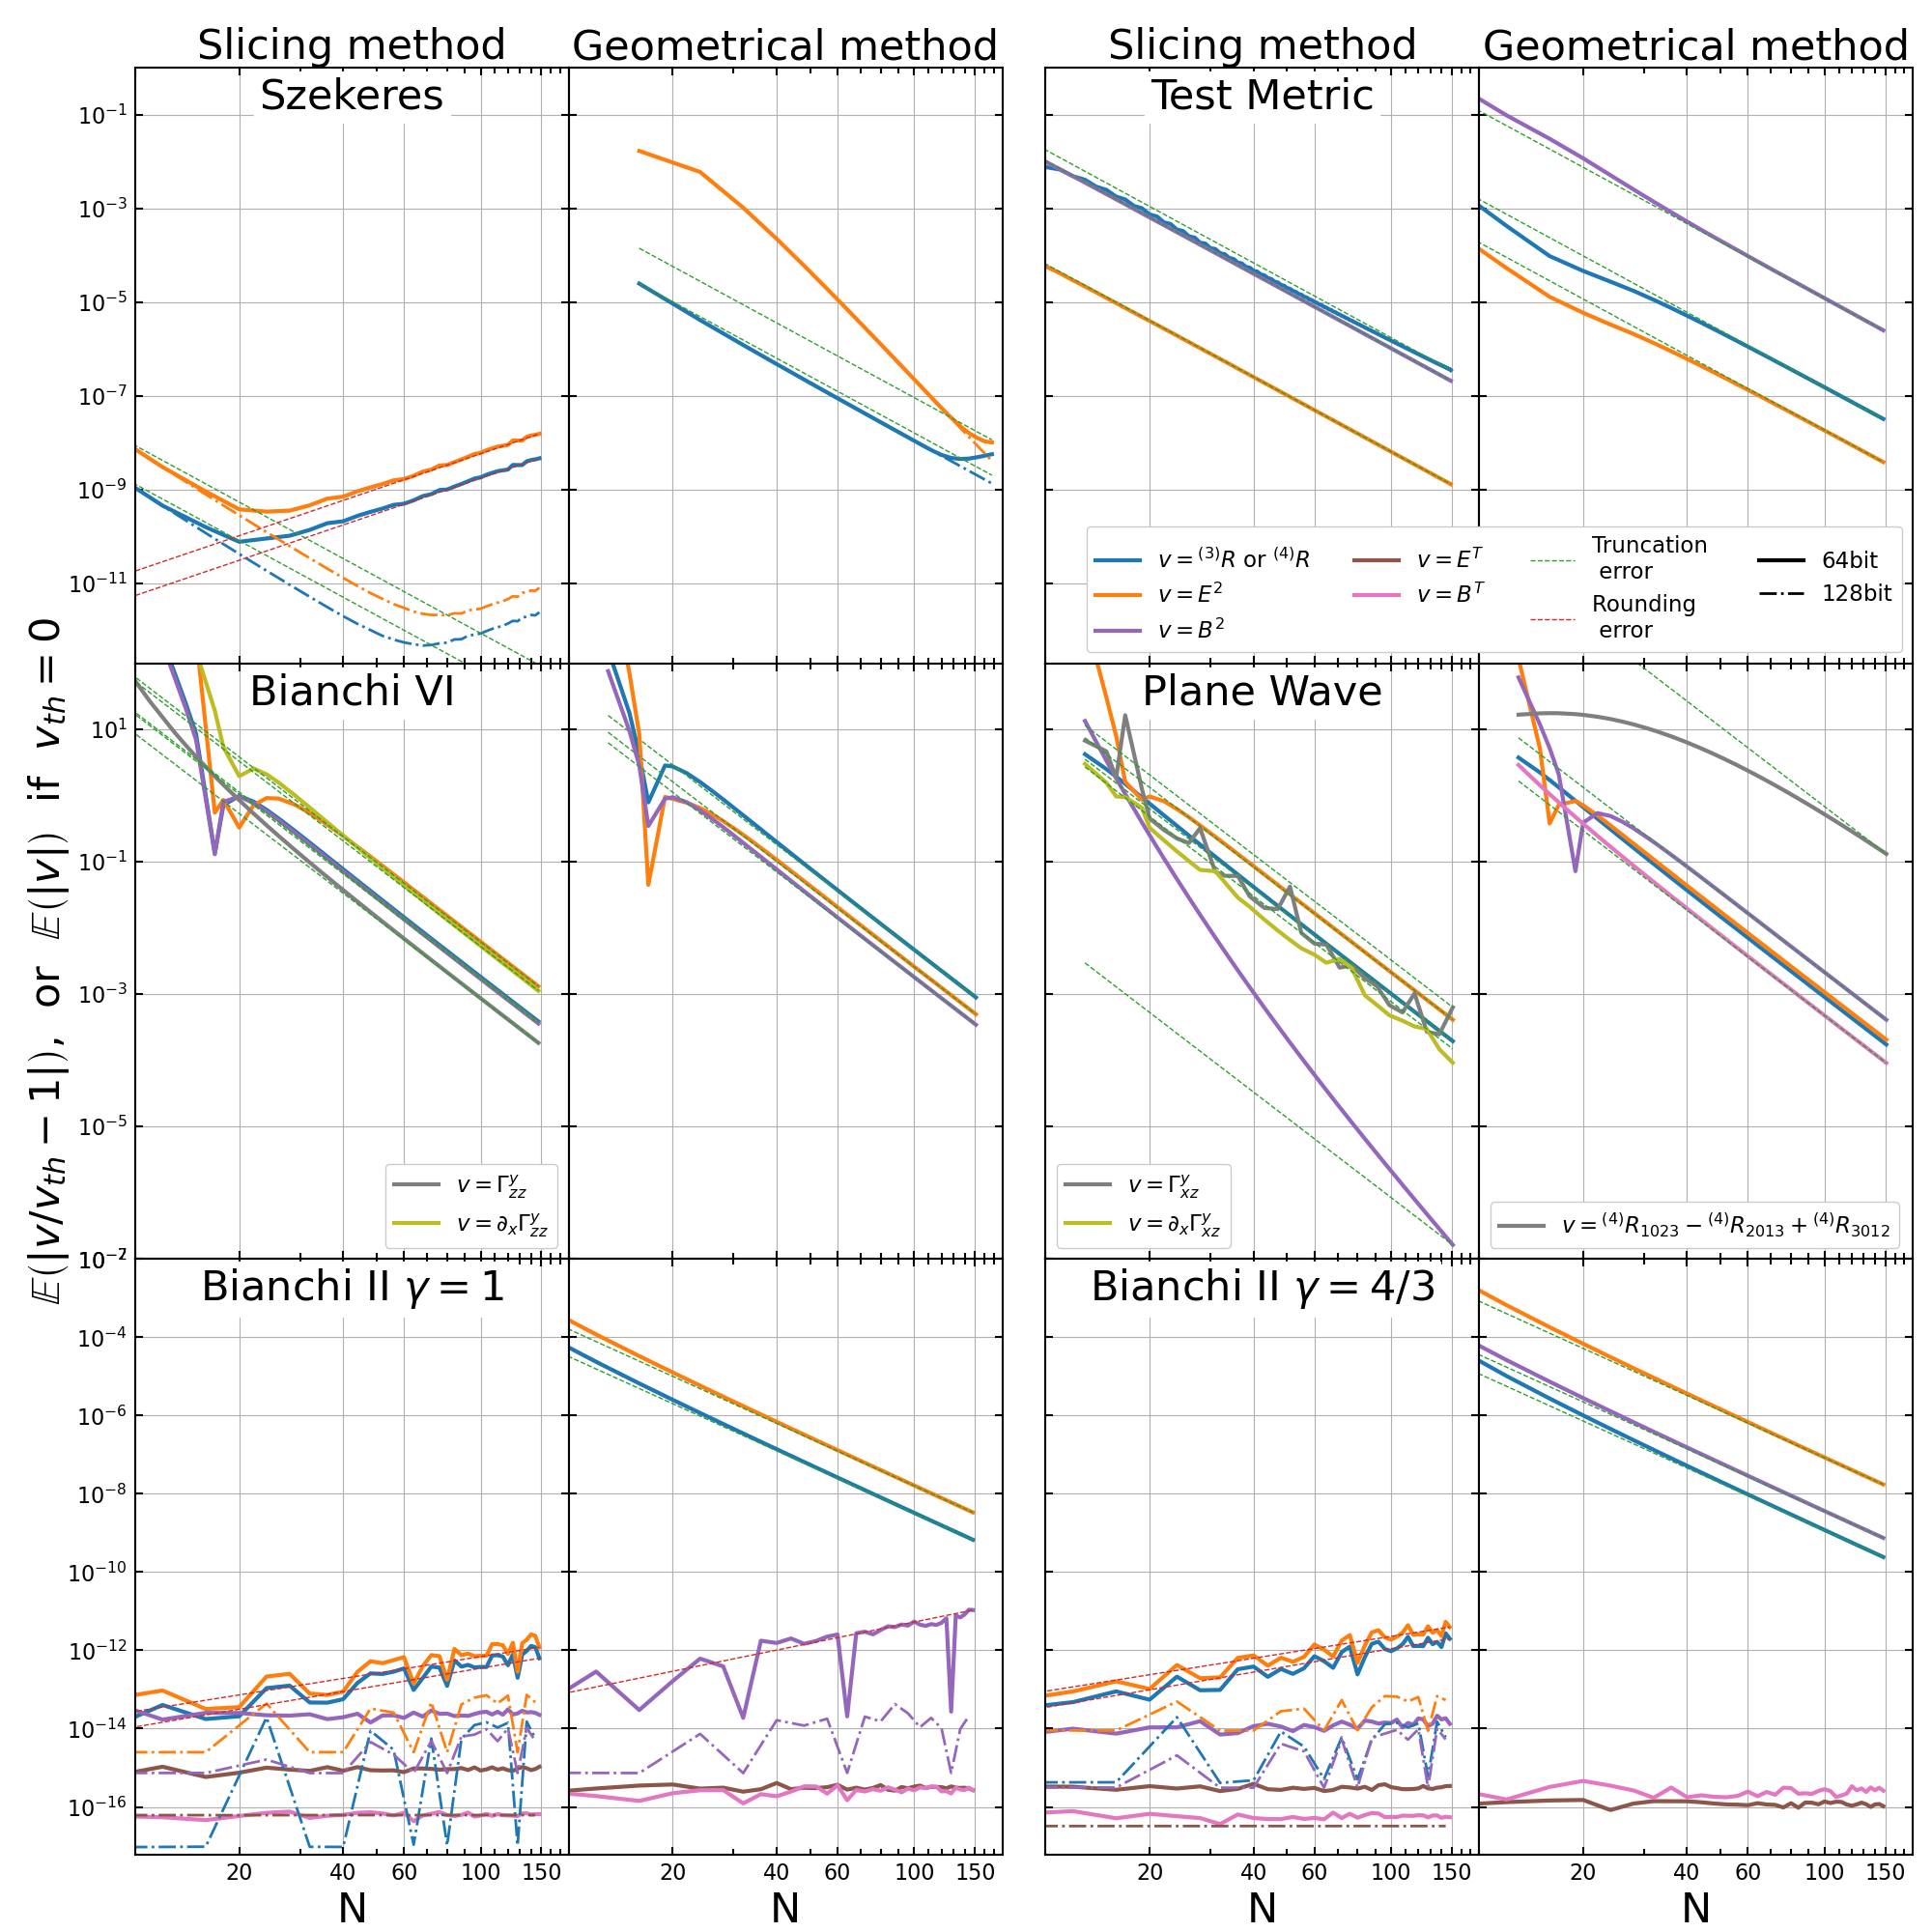

In [9]:
fig = plt.figure(figsize=(20, 20))
outer = gridspec.GridSpec(3, 2, hspace=0, wspace=0.05,left=0.07,right=0.99,top=0.965,bottom=0.04)
plotSzekeres(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[0], wspace=0, hspace=0.1))
plotTestMetric(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[1], wspace=0, hspace=0.1))
plotBianchiVI(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[2], wspace=0, hspace=0.1))
plotPlaneWave(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[3], wspace=0, hspace=0.1))
plotBianchiIIg1(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[4], wspace=0, hspace=0.1))
plotBianchiIIg4d3(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[5], wspace=0, hspace=0.1))
fig.show()
#fig.tight_layout()
plt.savefig('Plots/Error.pdf')

<IPython.core.display.Javascript object>


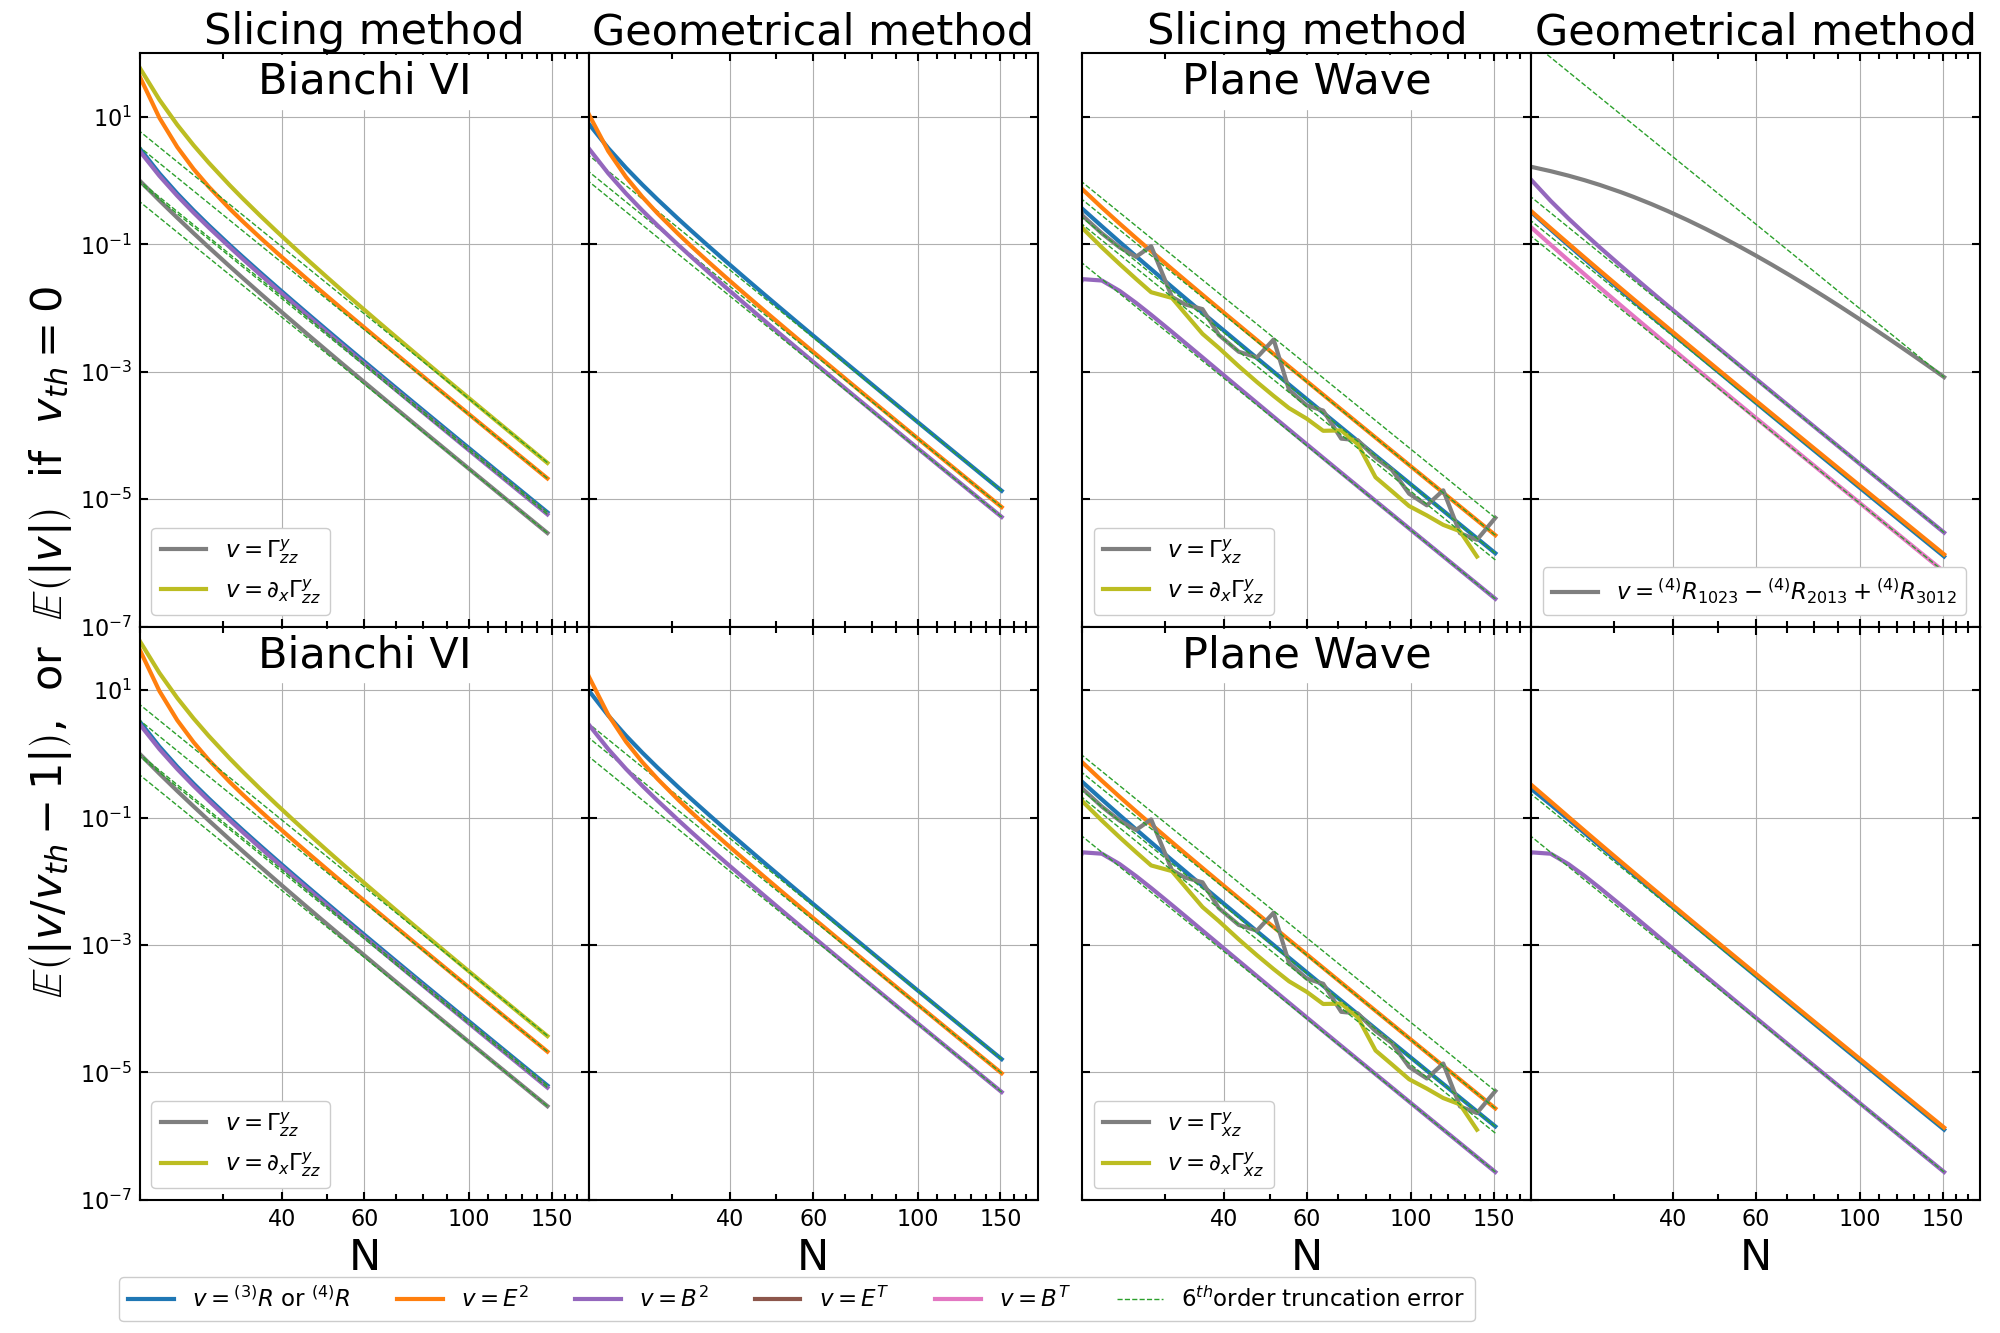

In [10]:
fig = plt.figure(figsize=(20, 13.33))
outer = gridspec.GridSpec(2, 2, hspace=0, wspace=0.05,left=0.07,right=0.99,top=0.96,bottom=0.1)
plotBianchiVIo6(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[0], wspace=0, hspace=0.1))
plotBianchiVIo6R(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[2], wspace=0, hspace=0.1))
plotPlaneWaveo6(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[1], wspace=0, hspace=0.1))
plotPlaneWaveo6R(fig, gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[3], wspace=0, hspace=0.1))
fig.show()
#fig.tight_layout()
plt.savefig('Plots/Erroro6.pdf')

<IPython.core.display.Javascript object>


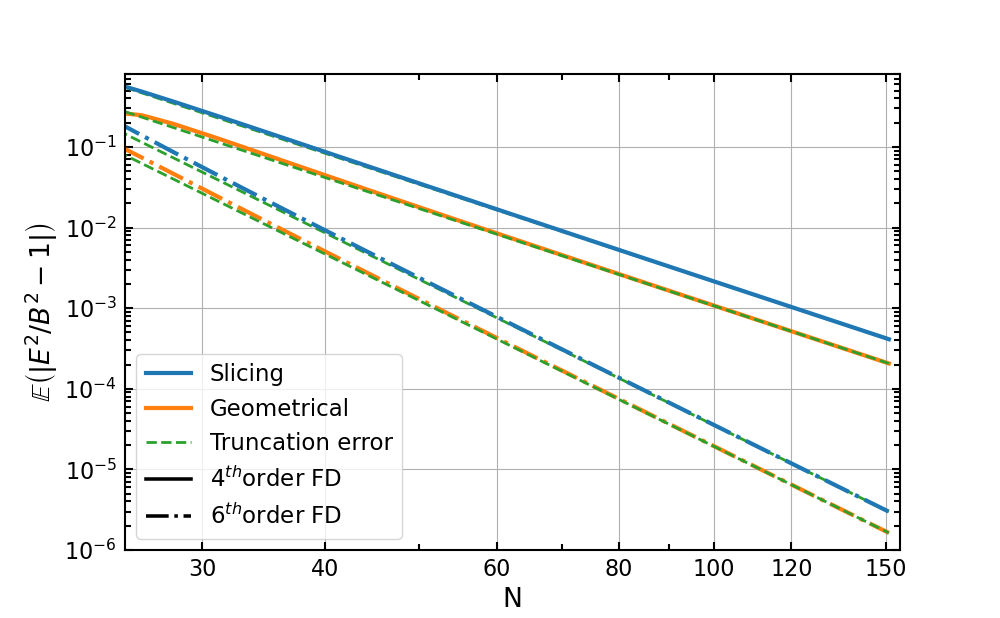

In [5]:
spacetime = 'PlaneWave'
fs    = pd.read_csv('ErrorData/'+spacetime+'_Slicing_B2vsE2.csv')
fso6  = pd.read_csv('ErrorData/'+spacetime+'_Slicing_B2vsE2_o6.csv')
fso6R = pd.read_csv('ErrorData/'+spacetime+'_Slicing_B2vsE2_o6R.csv')
fg    = pd.read_csv('ErrorData/'+spacetime+'_Geometrical_B2vsE2.csv')
fgo6  = pd.read_csv('ErrorData/'+spacetime+'_Geometrical_B2vsE2_o6.csv')
fgo6R = pd.read_csv('ErrorData/'+spacetime+'_Geometrical_B2vsE2_o6R.csv')

idec = -1
phi = (1+np.sqrt(5))/2
plt.figure(figsize=(10,10/phi))

#plt.loglog(fs['N'], fs['B2/E2-1'], 'C0', label='Slicing')
yplot_4th_order_decrease = [np.array(fs['B2/E2-1'])[idec]*((np.array(fs['N'])[idec]/N)**4) for N in fs['N']]
plt.loglog(fs['N'], yplot_4th_order_decrease, 'C2--', linewidth = 2)
plt.loglog(fs['N'], fs['E2/B2-1'], 'C0', label='Slicing')

#plt.loglog(fso6['N'], fso6['B2/E2-1'], 'darkblue', label='Slicing o6')
yplot_4th_order_decrease = [np.array(fso6['B2/E2-1'])[idec]*((np.array(fso6['N'])[idec]/N)**6) for N in fso6['N']]
plt.loglog(fso6['N'], yplot_4th_order_decrease, 'C2--', linewidth = 2)
plt.loglog(fso6['N'], fso6['E2/B2-1'], 'C0-.')
#plt.loglog(fso6['N'], fso6R['E2/B2-1'], 'C0:')

#plt.loglog(fg['N'], fg['B2/E2-1'], 'C1', label='Geometrical')
plt.loglog(fg['N'], fg['E2/B2-1'], 'C1', label='Geometrical')

#plt.loglog(fgo6['N'], fgo6['B2/E2-1'], 'sienna', label='Geometrical o6')
plt.loglog(fgo6['N'], fgo6['E2/B2-1'], 'C1-.')
#plt.loglog(fgo6['N'], fgo6R['E2/B2-1'], 'C1:')

yplot_4th_order_decrease = [np.array(fg['B2/E2-1'])[idec]*((np.array(fg['N'])[idec]/N)**4) for N in fg['N']]
plt.loglog(fg['N'], yplot_4th_order_decrease, 'C2--', linewidth = 2, label='Truncation error')
yplot_4th_order_decrease = [np.array(fgo6['B2/E2-1'])[idec]*((np.array(fgo6['N'])[idec]/N)**6) for N in fgo6['N']]
plt.loglog(fgo6['N'], yplot_4th_order_decrease, 'C2--', linewidth = 2)

plt.loglog(fg['N'], 0*fg['N'], 'k', linewidth = 2.55, label=r'$4^{th}$'+'order FD')
plt.loglog(fg['N'], 0*fg['N'], 'k-.', linewidth = 2.55, label=r'$6^{th}$'+'order FD')

plt.legend(loc=3, prop={'size': legendsize})
plt.grid()
plt.xlabel('N')
plt.ylim(1e-6, 8e-1)
plt.xticks([30,40,60,80,100,120,150], ['30','40','60','80','100','120','150'])
plt.xlim(25, 155)
plt.ylabel(r'$\mathbb{E}\left(|E^2/B^2-1|\right)$')
plt.savefig('Plots/'+spacetime+'_B2vsE2.pdf')

In [24]:
10.0 in list(tA['N'])

False

<IPython.core.display.Javascript object>


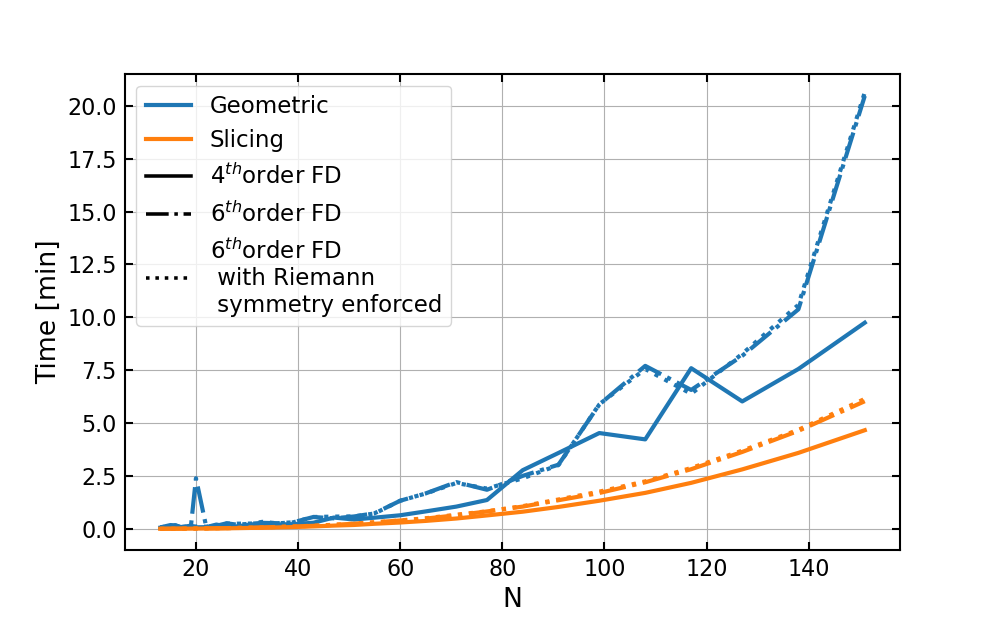

In [20]:
phi = (1+np.sqrt(5))/2
plt.figure(figsize=(10,10/phi))

spacetime = 'PlaneWave'
t = pd.read_csv('ErrorData/'+spacetime+'_Geometric_Time.csv')
#plt.plot(t['N'], t['Time']/60, 'C0', label='Geometric')
tdict = {t['N'][i]:t['Time'][i] for i in range(len(t['N']))}

tA = pd.read_csv('ErrorData/'+spacetime+'_Geometric_TimeA.csv')
#plt.plot(tA['N'], tA['Time']/60, 'C0')
tAdict = {tA['N'][i]:tA['Time'][i] for i in range(len(tA['N']))}

tB = pd.read_csv('ErrorData/'+spacetime+'_Geometric_TimeB.csv')
#plt.plot(tB['N'], tB['Time']/60, 'C0')
tBdict = {tB['N'][i]:tB['Time'][i] for i in range(len(tB['N']))}

tC = pd.read_csv('ErrorData/'+spacetime+'_Geometric_TimeC.csv')
#plt.plot(tC['N'], tC['Time']/60, 'C0')
tCdict = {tC['N'][i]:tC['Time'][i] for i in range(len(tC['N']))}

Timemin = []
Timemax = []
for N in t['N']:
    tlist = [tdict[N]]
    if N in list(tA['N']):
        tlist += [tAdict[N]]
    if N in list(tB['N']):
        tlist += [tBdict[N]]
    if N in list(tC['N']):
        tlist += [tCdict[N]]
    Timemin += [np.min(np.array(tlist))]
    Timemax += [np.max(np.array(tlist))]
    #print(N, '{:.2f}'.format(Timemin[-1]), tlist, '{:.2f}'.format(Timemax[-1]))
plt.plot(t['N'], np.array(Timemin), 'C0', label='Geometric')
t = pd.read_csv('ErrorData/'+spacetime+'_Geometric_Time_o6.csv')

plt.plot(t['N'], t['Time'], 'C0-.')
t = pd.read_csv('ErrorData/'+spacetime+'_Geometric_Time_o6R.csv')
plt.plot(t['N'], t['Time'], 'C0:')

t = pd.read_csv('ErrorData/'+spacetime+'_Slicing_Time.csv')
plt.plot(t['N'], t['Time'], 'C1', label='Slicing')
t = pd.read_csv('ErrorData/'+spacetime+'_Slicing_Time_o6.csv')
plt.plot(t['N'], t['Time'], 'C1-.')
t = pd.read_csv('ErrorData/'+spacetime+'_Slicing_Time_o6R.csv')
plt.plot(t['N'], t['Time'], 'C1:')

plt.plot(t['N'], -10*t['N'], 'k', linewidth = 2.55, label=r'$4^{th}$'+'order FD')
plt.plot(t['N'], -10*t['N'], 'k-.', linewidth = 2.55, label=r'$6^{th}$'+'order FD')
plt.plot(t['N'], -10*t['N'], 'k:', linewidth = 2.55, label=r'$6^{th}$'+'order FD \n with Riemann \n symmetry enforced')

plt.legend(prop={'size': legendsize})
plt.xlabel('N')
plt.ylabel('Time [min]')
plt.grid()
plt.ylim(-1,21.5)
plt.savefig('Plots/time.pdf')